In [6]:
import seaborn as sns

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt



df = pd.read_csv("/Users/srishtiagarwal/Desktop/eda2/titanic/train.csv")  # adjust filename if needed

# Show top 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Cell 2: Basic info and statistics
print(df.shape)
df.info()
df.describe(include='all')
df.isnull().sum()
df.columns


(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

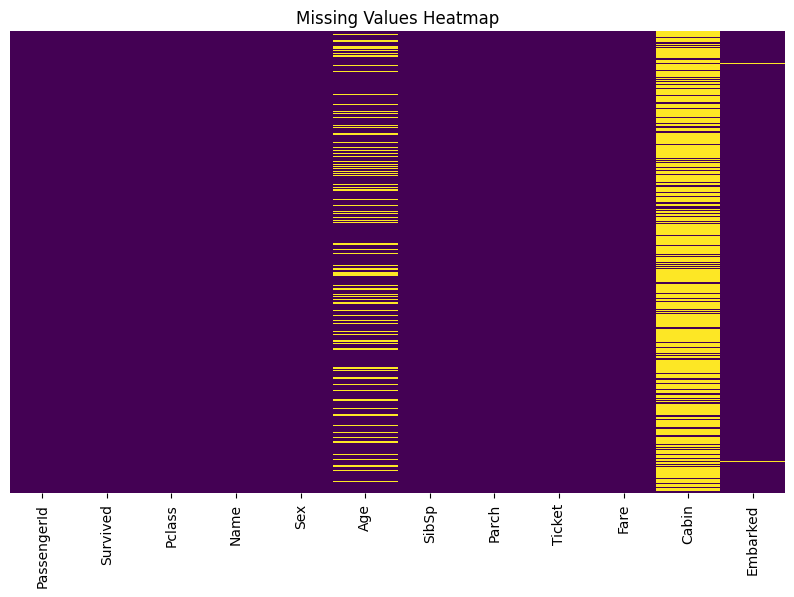

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])


# Create a copy to avoid modifying the original DataFrame

titanic_data_filled = df.copy()



# Separate numerical and categorical columns

numerical_cols = titanic_data_filled.select_dtypes(include=['number']).columns
categorical_cols = titanic_data_filled.select_dtypes(exclude=['number']).columns



# Use IterativeImputer for numerical features

imputer_num = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)

titanic_data_filled[numerical_cols] = imputer_num.fit_transform(titanic_data_filled[numerical_cols])

for col in categorical_cols:

    titanic_data_filled[col] = titanic_data_filled[col].fillna(titanic_data_filled[col].mode()[0])



# Verify if there are any missing values left

print("\nMissing values after imputation:\n", titanic_data_filled.isnull().sum())


Missing values after imputation:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64



Survival Count:
 Survived
0.0    549
1.0    342
Name: count, dtype: int64


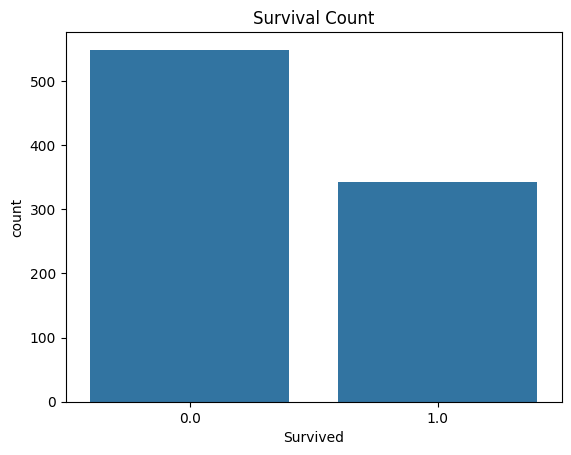


Pclass Distribution:
 Pclass
3.0    491
1.0    216
2.0    184
Name: count, dtype: int64


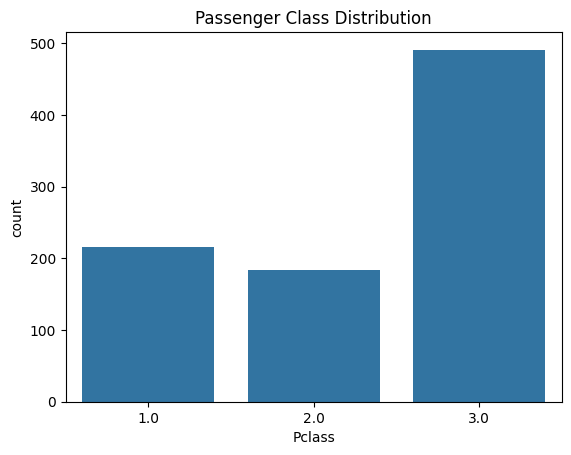


Age Statistics:
 count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64


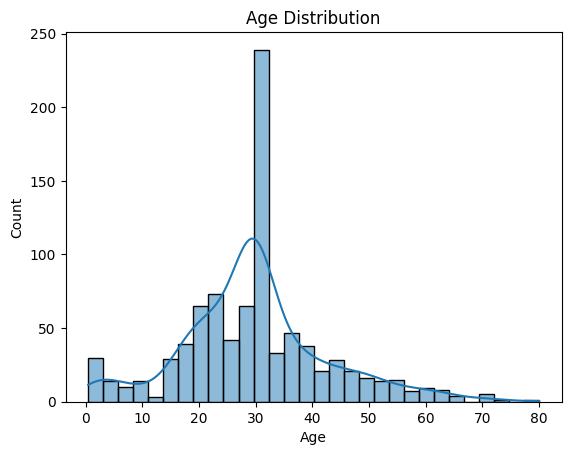


Sex Distribution:
 Sex
male      577
female    314
Name: count, dtype: int64


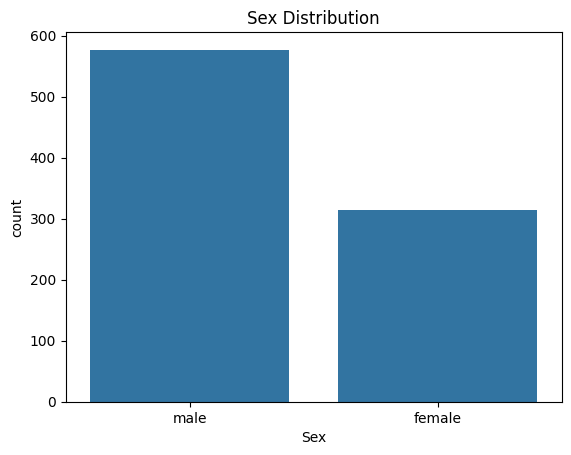

In [24]:
print("\nSurvival Count:\n", titanic_data_filled['Survived'].value_counts())

sns.countplot(x='Survived', data=titanic_data_filled)
plt.title('Survival Count')
plt.show()

# Analyze 'pclass'
print("\nPclass Distribution:\n", titanic_data_filled['Pclass'].value_counts())

sns.countplot(x='Pclass', data=titanic_data_filled)

plt.title('Passenger Class Distribution')

plt.show()
print("\nAge Statistics:\n", titanic_data_filled['Age'].describe())

sns.histplot(x='Age', data=titanic_data_filled, kde=True)

plt.title('Age Distribution')

plt.show()
print("\nSex Distribution:\n", titanic_data_filled['Sex'].value_counts())

sns.countplot(x='Sex', data=titanic_data_filled)

plt.title('Sex Distribution')

plt.show()





Survival by Gender:
 Sex     Survived
female  1.0         233
        0.0          81
male    0.0         468
        1.0         109
Name: count, dtype: int64


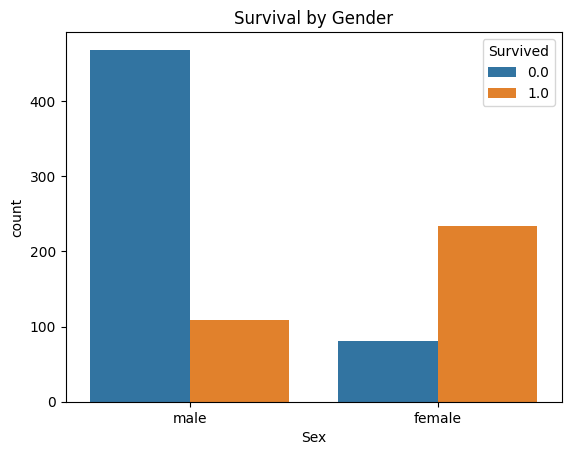


Survival by Passenger Class:
 Pclass  Survived
1.0     1.0         136
        0.0          80
2.0     0.0          97
        1.0          87
3.0     0.0         372
        1.0         119
Name: count, dtype: int64


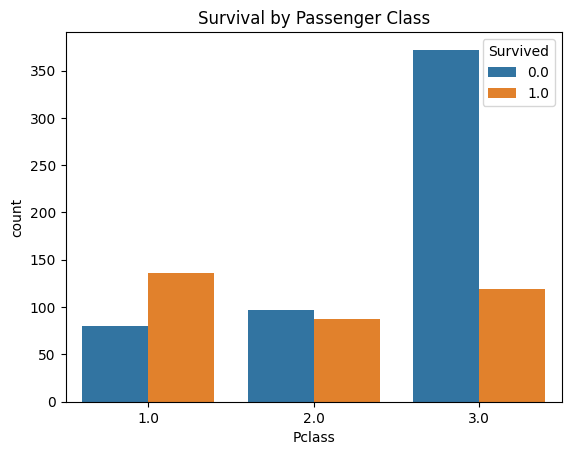


Survival by Age Group:
 Age_group  Survived
Child      1.0          70
           0.0          69
Adult      0.0         473
           1.0         271
Senior     0.0           7
           1.0           1
Name: count, dtype: int64


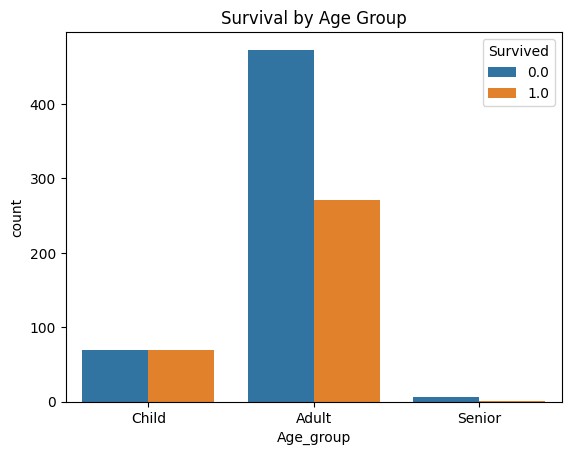


Survival by Gender and Class:
 Sex     Pclass  Survived
female  1.0     1.0          91
                0.0           3
        2.0     1.0          70
                0.0           6
        3.0     0.0          72
                1.0          72
male    1.0     0.0          77
                1.0          45
        2.0     0.0          91
                1.0          17
        3.0     0.0         300
                1.0          47
Name: count, dtype: int64


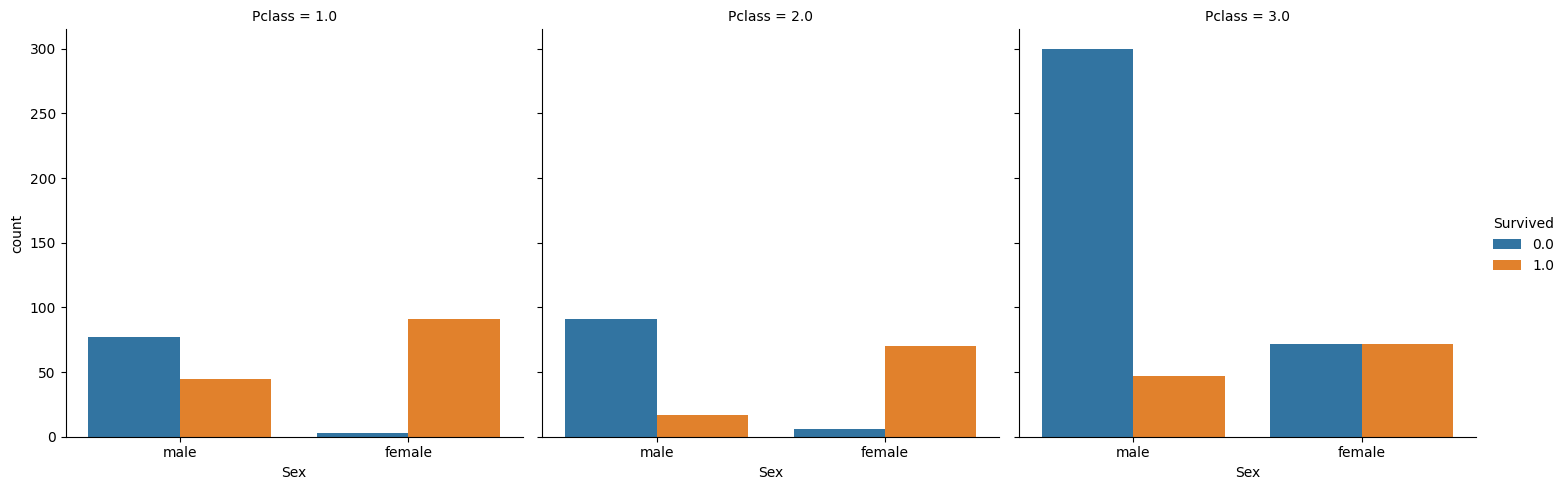

In [31]:
print("\nSurvival by Gender:\n", titanic_data_filled.groupby('Sex')['Survived'].value_counts())

sns.countplot(x='Sex', hue='Survived', data=titanic_data_filled)

plt.title('Survival by Gender')

plt.show()



# Analyze survival based on passenger class

print("\nSurvival by Passenger Class:\n", titanic_data_filled.groupby('Pclass')['Survived'].value_counts())

sns.countplot(x='Pclass', hue='Survived', data=titanic_data_filled)

plt.title('Survival by Passenger Class')

plt.show()
titanic_data_filled['Age_group'] = pd.cut(titanic_data_filled['Age'], bins=[0, 18, 65, 100], labels=['Child', 'Adult', 'Senior'])

print("\nSurvival by Age Group:\n", titanic_data_filled.groupby('Age_group', observed=False)['Survived'].value_counts())

sns.countplot(x='Age_group', hue='Survived', data=titanic_data_filled)

plt.title('Survival by Age Group')

plt.show()
print("\nSurvival by Gender and Class:\n", titanic_data_filled.groupby(['Sex', 'Pclass'])['Survived'].value_counts())

sns.catplot(x='Sex', hue='Survived', col='Pclass', kind='count', data=titanic_data_filled)

plt.show()

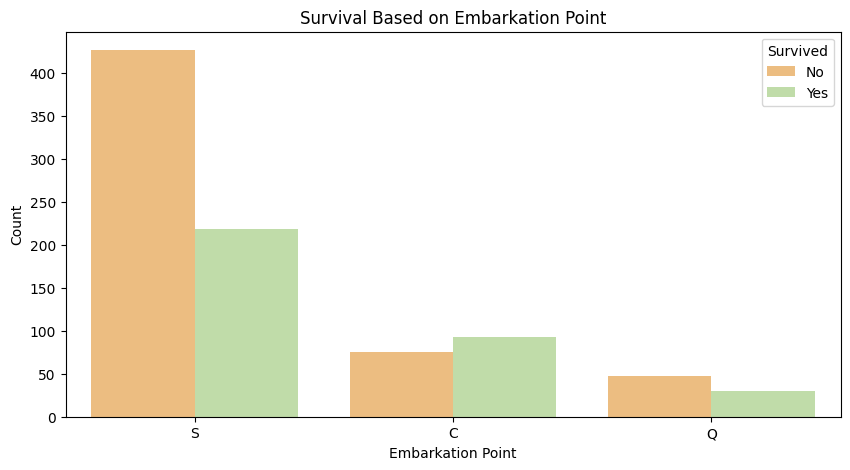

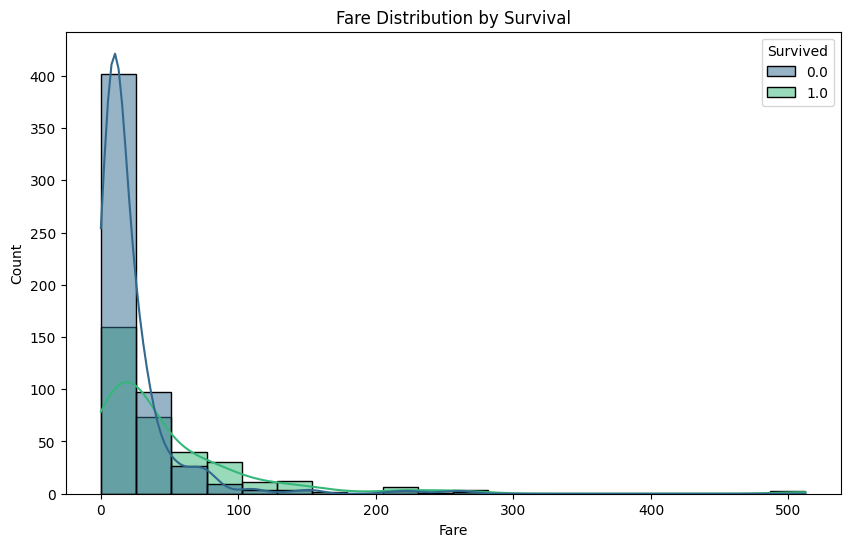

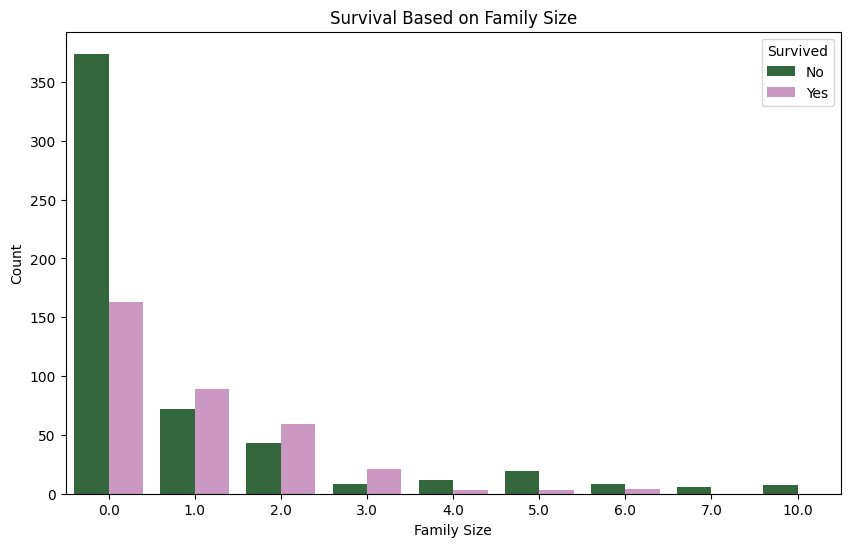

In [43]:
plt.figure(figsize=(10, 5))

sns.countplot(x='Embarked', hue='Survived', data=titanic_data_filled, palette='Spectral')

plt.title('Survival Based on Embarkation Point')

plt.xlabel('Embarkation Point')

plt.ylabel('Count')

plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()
plt.figure(figsize=(10, 6))

sns.histplot(titanic_data_filled, x='Fare', hue='Survived', bins=20, kde=True, palette='viridis')

plt.title('Fare Distribution by Survival')

plt.xlabel('Fare')

plt.ylabel('Count')

plt.show()
titanic_data_filled['family_size'] = titanic_data_filled['SibSp'] + titanic_data_filled['Parch']

plt.figure(figsize=(10, 6))

sns.countplot(x='family_size', hue='Survived', data=titanic_data_filled, palette='cubehelix')

plt.title('Survival Based on Family Size')

plt.xlabel('Family Size')

plt.ylabel('Count')

plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

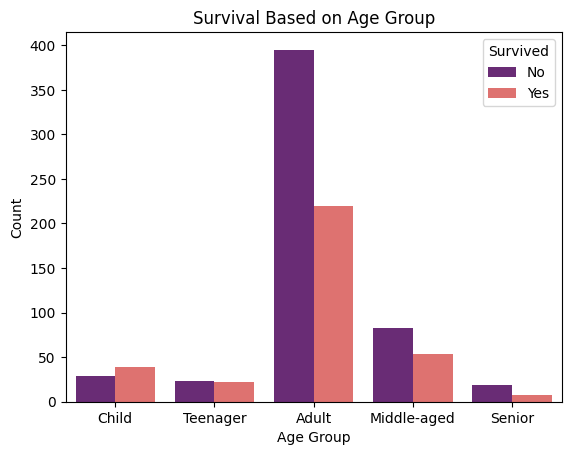

In [57]:
bins = [0, 12, 18, 40, 60,100]
labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']

titanic_data_filled['Age_group'] = pd.cut(
    titanic_data_filled['Age'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)

# Optional: define order for consistent plotting
age_order = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']

# Plot
sns.countplot(
    x='Age_group',
    hue='Survived',
    data=titanic_data_filled,
    palette='magma',
    order=age_order
)
plt.title('Survival Based on Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

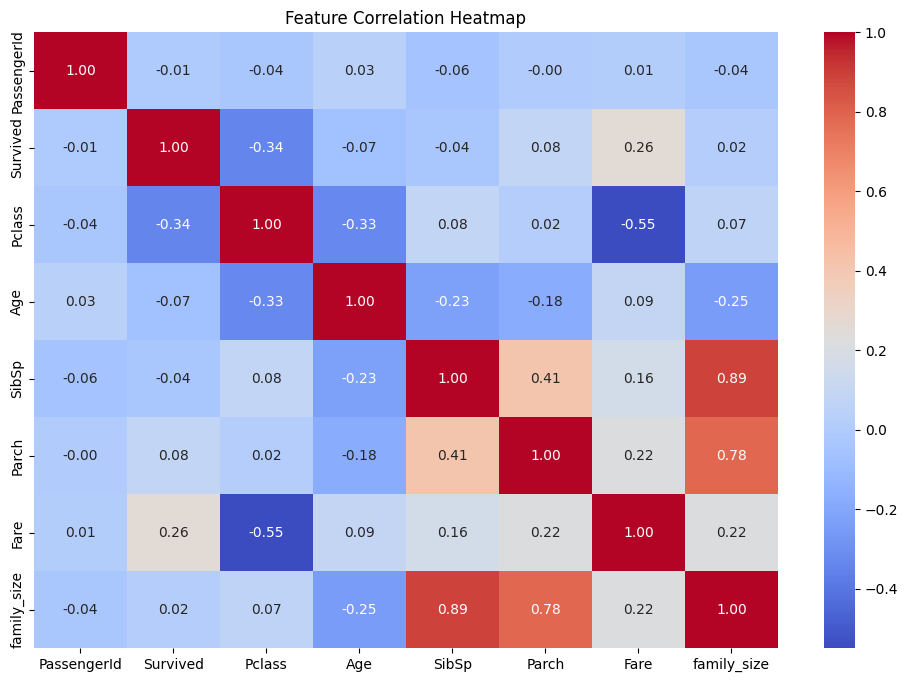

In [59]:
plt.figure(figsize=(12, 8))
numeric_features = titanic_data_filled.select_dtypes(include=np.number)

sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Feature Correlation Heatmap')

plt.show()